In [1]:
import zipfile
import pandas as pd

zip_file_path = '/content/house-prices.zip'

dfs = {}

with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
  file_names = zip_ref.namelist()
  print(file_names)

  csv_files = [file for file in file_names if file.endswith('.csv')]
  print('CSV files names',csv_files)

  for csv_file in csv_files:
    with zip_ref.open(csv_file) as file:
      df = pd.read_csv(file)
      dfs[csv_file] = df


train_file = dfs['train.csv']
test_file = dfs['test.csv']

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']
CSV files names ['sample_submission.csv', 'test.csv', 'train.csv']


In [39]:
train_file.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#UnderStanding

##- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSSubClass: Satışa konu olan konutun tipini tanımlar.
  *  20	1-STORY 1946 & NEWER ALL STYLES
  *      30	1-STORY 1945 & OLDER
  *     40	1-STORY W/FINISHED ATTIC ALL AGES
  *    45	1-1/2 STORY - UNFINISHED ALL AGES
  *   50	1-1/2 STORY FINISHED ALL AGES
  *  60	2-STORY 1946 & NEWER
  * 70	2-STORY 1945 & OLDER
  *  75	2-1/2 STORY ALL AGES
  *  80	SPLIT OR MULTI-LEVEL
  *  85	SPLIT FOYER
  *  90	DUPLEX - ALL STYLES AND AGES
  *  120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
  *  150	1-1/2 STORY PUD - ALL AGES
  *  160	2-STORY PUD - 1946 & NEWER
  *  180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
  *  190	2 FAMILY CONVERSION - ALL STYLES AND AGES

- MSZoning: Identifies the general zoning classification of the sale.
- MSZoning: Satışın genel imar sınıfını tanımlar.
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

       ----------------------------
       A Tarım
       C Ticari
       FV Yüzen Köy Konutu
       I Endüstriyel
       RH Konut Yüksek Yoğunluklu
       RL Konut Düşük Yoğunluk
       RP Konut Düşük Yoğunluklu Park
       RM Konut Orta Yoğunluk
- LotFrontage: Linear feet of street connected to property
- LotFrontage: Mülke bağlanan caddenin doğrusal ayakları

- LotArea: Lot size in square feet(Etkili)
- LotArea: Metrekare cinsinden parsel büyüklüğü

##- Street: Type of road access to property(Etkisiz Gİbi\)
- Sokak: Mülke karayolu erişim türü
       Grvl	Gravel
       Pave	Paved

##- Alley: Type of alley access to property --etkili
- Sokak: Mülke erişim yolu türü
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

##- LotShape: General shape of property
- LotShape: Mülkün genel şekli

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

 ##- LandContour: Flatness of the property
- LandContour: Mülkün düzlüğü

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
       
 ##- Utilities: Type of utilities available
- Yardımcı Programlar: Mevcut yardımcı program türleri
       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

 ##- LotConfig: Lot configuration
- LotConfig: Parti konfigürasyonu

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property                  
##- LandSlope: Slope of property
- Arazi Eğimi: Mülkün eğimi
       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope


##- Neighborhood: Physical locations within Ames city limits
- Mahalle: Ames şehir sınırları içindeki fiziksel konumlar

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
##- Condition1: Proximity to various conditions
- Koşul1: Çeşitli koşullara yakınlık

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

##- Condition2: Proximity to various conditions (if more than one is present)
- Koşul2: Çeşitli koşullara yakınlık (birden fazla varsa)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
##- BldgType: Type of dwelling
- BldgType: Konut tipi
       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

##- HouseStyle: Style of dwelling
- HouseStyle: Konut tarzı
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
##- OverallQual: Rates the overall material and finish of the house
- Genel Kalite: Evin genel malzemesini ve kaplamasını derecelendirir

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
##- OverallCond: Rates the overall condition of the house
- Genel Koşul: Evin genel durumunu derecelendirir
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

##- YearBuilt: Original construction date
- Yapım Yılı: Orijinal inşaat tarihi


##- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- YearRemodAdd: Tadilat tarihi (tadilat veya ekleme yoksa inşaat tarihiyle aynı)


##- RoofStyle: Type of roof
- RoofStyle: Çatı tipi
       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

##- RoofMatl: Roof material
- RoofMatl: Çatı malzemesi
       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

##- Exterior1st: Exterior covering on house
- Dış1: Evin dış kaplaması
       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

##- Exterior2nd: Exterior covering on house (if more than one material)
- Dış2: Evin dış kaplaması (birden fazla malzeme varsa)
       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

##- MasVnrType: Masonry veneer type
- MasVnrType: Duvar kaplama tipi
       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
##- MasVnrArea: Masonry veneer area in square feet
- MasVnrArea: Metrekare cinsinden duvar kaplama alanı

##- ExterQual: Evaluates the quality of the material on the exterior
- ExterQual: Dış cephedeki malzemenin kalitesini değerlendirir
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
##- ExterCond: Evaluates the present condition of the material on the exterior
- ExterCond: Dış cephedeki malzemenin mevcut durumunu değerlendirir
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

##- BsmtQual: Evaluates the height of the basement
- BsmtQual: Bodrum katının yüksekliğini değerlendirir
       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement


- Foundation: Type of foundation
- Vakıf: Vakıf türü
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood


##- BsmtCond: Evaluates the general condition of the basement
- BsmtCond: Bodrumun genel durumunu değerlendirir
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement





- BsmtExposure: Refers to walkout or garden level walls
- BsmtExposure: Grev veya bahçe seviyesindeki duvarları ifade eder
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

- BsmtFinType1: Rating of basement finished area
- BsmtFinType1: Bodrumun bitmiş alanının derecelendirmesi
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF1: Tip 1 bitmiş metrekare

- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinType2: Bodrum katındaki bitmiş alanın derecelendirmesi (birden fazla tür varsa)
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

- BsmtFinSF2: Type 2 finished square feet
- BsmtFinSF2: Tip 2 bitmiş metrekare

- BsmtUnfSF: Unfinished square feet of basement area
- BsmtUnfSF: Bodrum alanının tamamlanmamış metrekaresi

- TotalBsmtSF: Total square feet of basement area
- TotalBsmtSF: Bodrum alanının toplam metrekaresi

- Heating: Type of heating
- Isıtma: Isıtma türü
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

- HeatingQC: Heating quality and condition
- IsıtmaQC: Isıtma kalitesi ve durumu
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

- CentralAir: Central air conditioning
- CentralAir: Merkezi klima
       N	No
       Y	Yes

- Electrical: Electrical system
- Elektrik: Elektrik sistemi
       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

- 1stFlrSF: First Floor square feet
- 1stFlrSF: Birinci Kat metrekare
-
- 2ndFlrSF: Second floor square feet
- 2ndFlrSF: İkinci katın metrekaresi
-
- LowQualFinSF: Low quality finished square feet (all floors)
- LowQualFinSF: Düşük kaliteli tamamlanmış metrekareler (tüm katlar)
-
- GrLivArea: Above grade (ground) living area square feet
- GrLivArea: Zemin üstü (zemin) yaşam alanı metrekare
-
- BsmtFullBath: Basement full bathrooms
- BsmtFullBath: Bodrum katındaki tam banyolar
-
- BsmtHalfBath: Basement half bathrooms
- BsmtHalfBath: Bodrum yarım banyolar
-
- FullBath: Full bathrooms above grade
- FullBath: Zeminin üzerinde tam banyolar
-
- HalfBath: Half baths above grade
- HalfBath: Zemin üstü yarım banyolar
-
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Yatak odası: Zeminin üzerindeki yatak odaları (bodrum katındaki yatak odaları dahil DEĞİLDİR)
-
- Kitchen: Kitchens above grade
- Mutfak: Üst sınıf mutfaklar
-
- KitchenQual: Kitchen quality
- KitchenQual: Mutfak kalitesi
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- TotRmsAbvGrd: Sınıfın üzerindeki toplam oda (banyolar hariç)

- Functional: Home functionality (Assume typical unless deductions are warranted)
- İşlevsel: Ev işlevselliği (Kesintiler garanti edilmedikçe tipik olduğunu varsayalım)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

- Fireplaces: Number of fireplaces
- Şömineler: Şömine sayısı

- FireplaceQu: Fireplace quality
- FireplaceQu: Şömine kalitesi
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

- GarageType: Garage location
- Garaj Türü: Garaj konumu
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

- GarageYrBlt: Year garage was built
- GarageYrBlt: Garajın yapıldığı yıl

- GarageFinish: Interior finish of the garage
- GarageFinish: Garajın iç kaplaması
       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

- GarageCars: Size of garage in car capacity
- GarageCars: Araç kapasitesine göre garajın boyutu

- GarageArea: Size of garage in square feet
- GarageArea: Garajın metrekare cinsinden boyutu

- GarageQual: Garage quality
- GarageQual: Garaj kalitesi
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

- GarageCond: Garage condition
- GarageCond: Garaj durumu
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

- PavedDrive: Paved driveway
- PavedDrive: Asfaltlanmış araba yolu
       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

- WoodDeckSF: Wood deck area in square feet
- WoodDeckSF: Metrekare cinsinden ahşap deck alanı

- OpenPorchSF: Open porch area in square feet
- OpenPorchSF: Metrekare cinsinden açık sundurma alanı

- EnclosedPorch: Enclosed porch area in square feet
- Kapalı Sundurma: Metrekare cinsinden kapalı sundurma alanı

- 3SsnPorch: Three season porch area in square feet
- 3SsnPorch: Metrekare cinsinden üç mevsim sundurma alanı

- ScreenPorch: Screen porch area in square feet
- ScreenPorch: Metrekare cinsinden ekran sundurma alanı

- PoolArea: Pool area in square feet
- PoolArea: Metrekare cinsinden havuz alanı

- PoolQC: Pool quality
- PoolQC: Havuz kalitesi

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

- Fence: Fence quality
- Çit: Çit kalitesi
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

- MiscFeature: Miscellaneous feature not covered in other categories
- MiscFeature: Diğer kategorilerde yer almayan çeşitli özellikler

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

- MiscVal: Value of miscellaneous feature
- MiscVal: Cesitli ozelliklerin Degeri

- MoSold: Month Sold (MM)
- MoSold: Satılan Ay (MM)

- YrSold: Year Sold (YYYY)
- Satıldığı Yıl: Satış Yılı (YYYY)

- SaleType: Type of sale
- Satış Türü: Satış türü

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

- SaleCondition: Condition of sale
- Satış Durumu: Satış Durumu
       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


#SOME VİSUALİZE

In [ ]:
train_file.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#Konut tipi sayılar kategorik ifade - her sayı bir ev tipini temsil ediyor
train_file['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

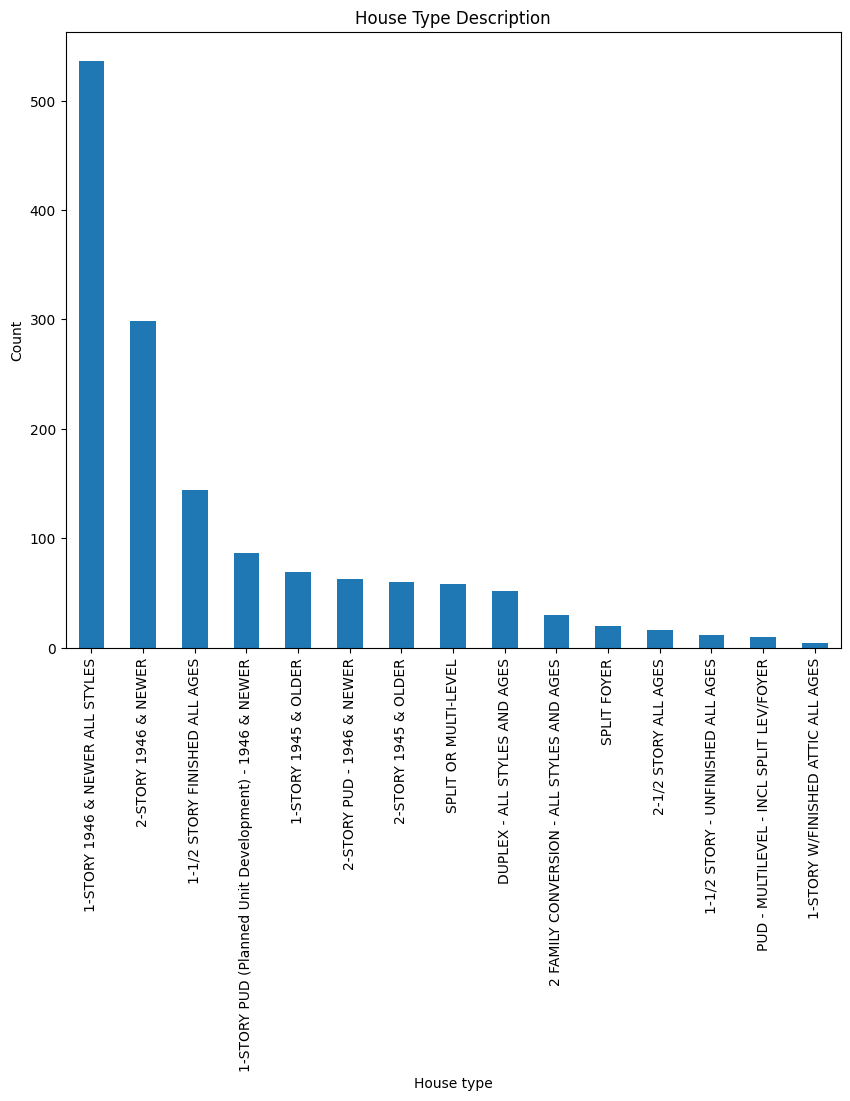

In [ ]:
import matplotlib.pyplot as plt
labels = {
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '1-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

data_eda = pd.DataFrame()
data_eda['MSSubClass'] = train_file['MSSubClass']
data_eda['HouseTypeDescription'] = data_eda['MSSubClass'].map(labels)

house_type_count = data_eda['HouseTypeDescription'].value_counts()

plt.figure(figsize = (10,8))
house_type_count.plot(kind = 'bar')
plt.title('House Type Description')
plt.xlabel('House type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##

In [ ]:
train_file['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [ ]:
#LotFrontage: Mülke bağlanan caddenin doğrusal ayakları

train_file['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
train_file['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [ ]:
train_file['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

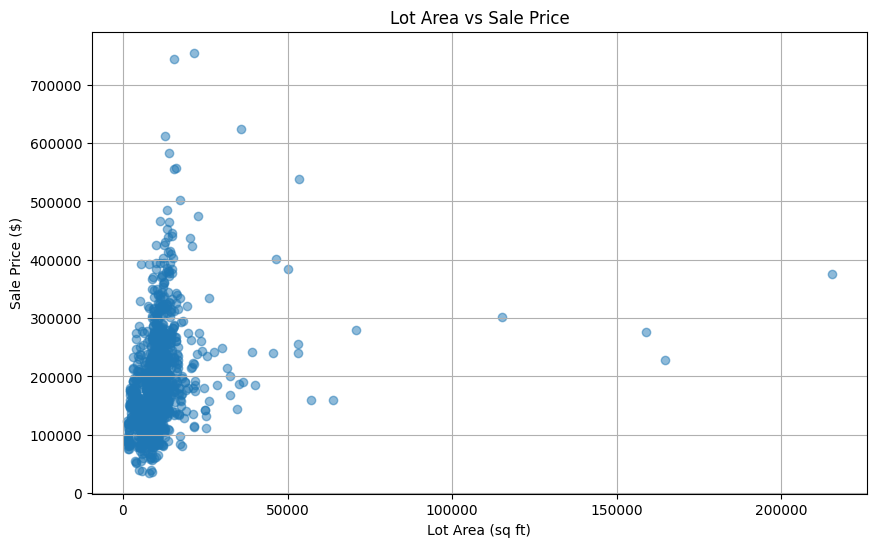

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(train_file['LotArea'],train_file['SalePrice'],alpha = 0.5)
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()

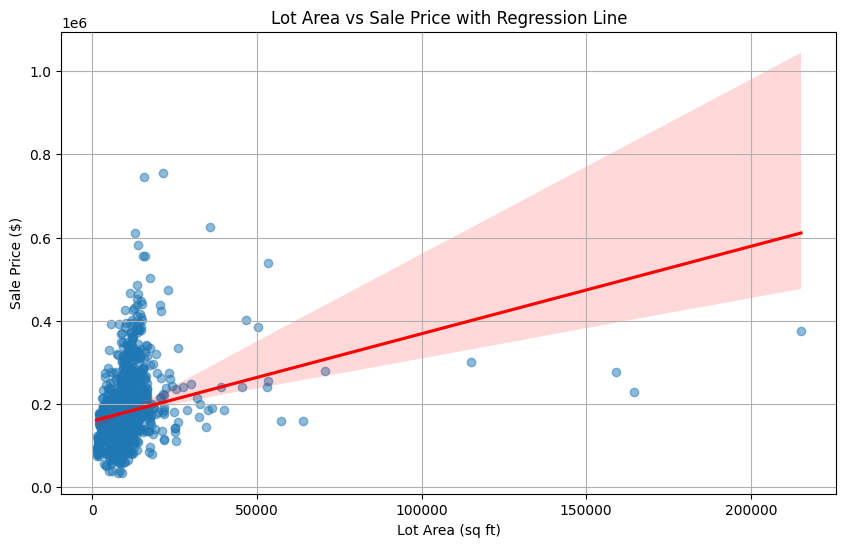

In [ ]:
import numpy as np
import seaborn as sns

plt.figure(figsize = (10,6))
sns.regplot(x='LotArea',y = 'SalePrice',data = train_file,scatter_kws = {'alpha':0.5},line_kws ={'color':'red'})
plt.title('Lot Area vs Sale Price with Regression Line')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()

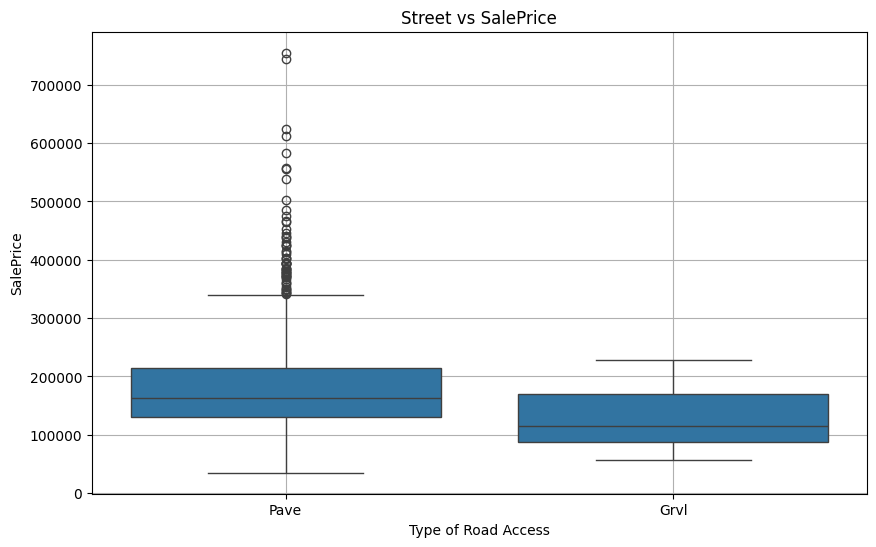

In [ ]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.boxplot(x='Street',y='SalePrice',data = train_file)
plt.title('Street vs SalePrice')
plt.xlabel('Type of Road Access')
plt.ylabel('SalePrice')
plt.grid()
plt.show()

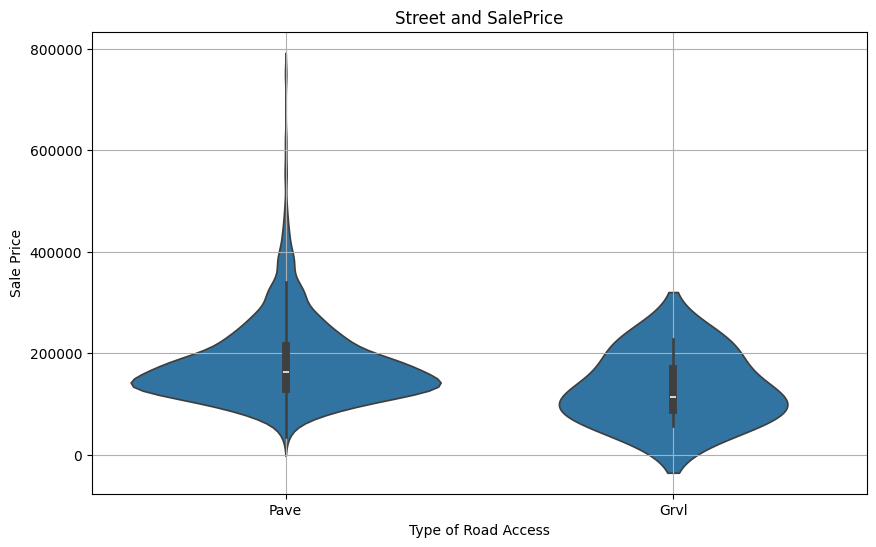

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Street',y = 'SalePrice',data = train_file)
plt.title('Street and SalePrice')
plt.xlabel('Type of Road Access')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

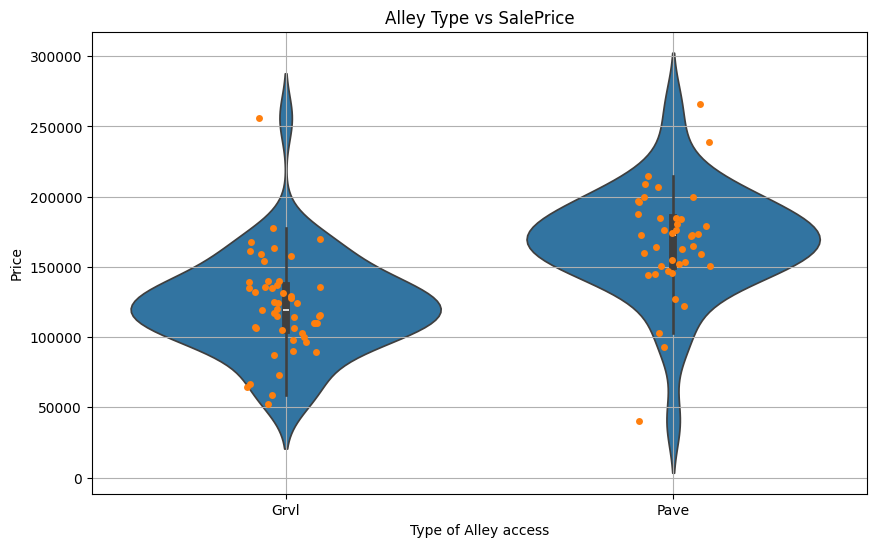

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x = 'Alley',y = 'SalePrice',data = train_file)
sns.stripplot(x='Alley',y = 'SalePrice',data=train_file,jitter=True)
plt.title('Alley Type vs SalePrice')
plt.xlabel('Type of Alley access')
plt.ylabel('Price')
plt.grid(True)
plt.show()

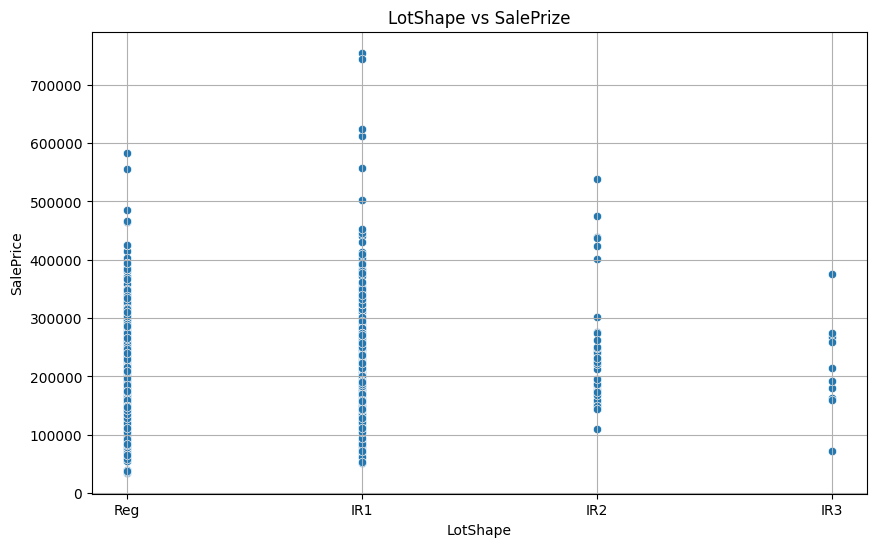

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'LotShape',y ='SalePrice',data = train_file)
plt.title('LotShape vs SalePrize')
plt.xlabel('LotShape')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

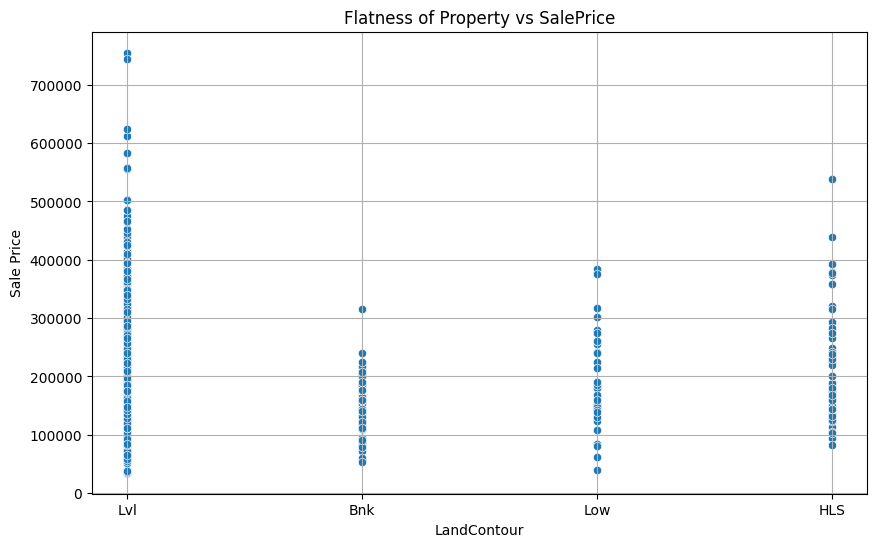

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='LandContour',y = 'SalePrice',data = train_file)
plt.title('Flatness of Property vs SalePrice')
plt.xlabel('LandContour')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

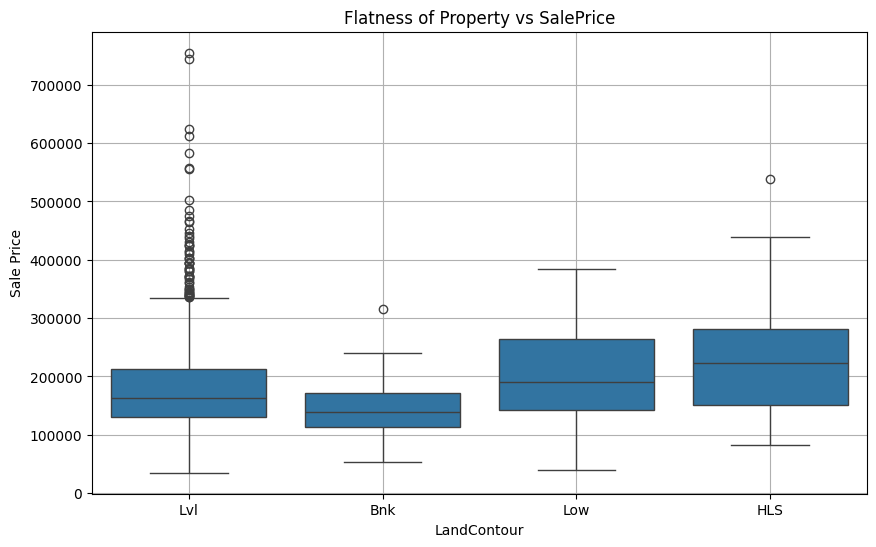

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'LandContour',y = 'SalePrice',data = train_file)
plt.title('Flatness of Property vs SalePrice')
plt.xlabel('LandContour')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

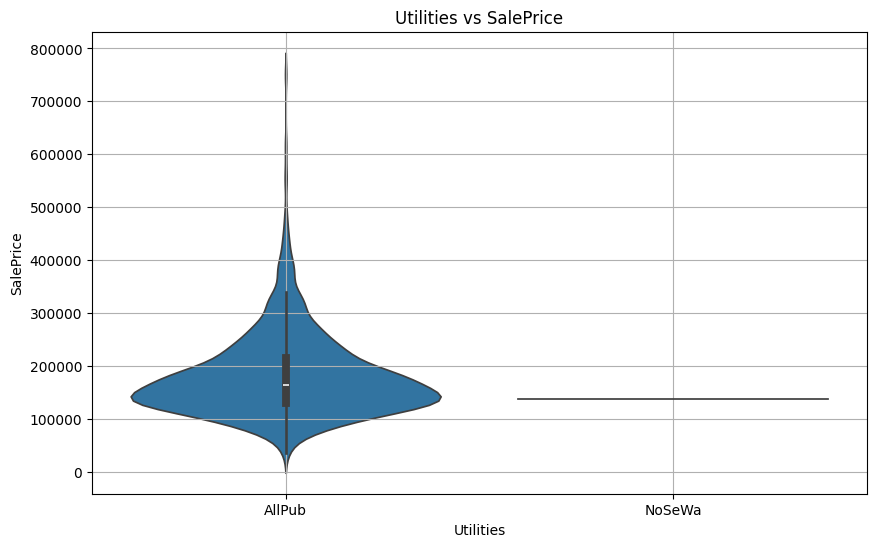

In [ ]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Utilities',y = 'SalePrice',data = train_file)
plt.title('Utilities vs SalePrice')
plt.xlabel('Utilities')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

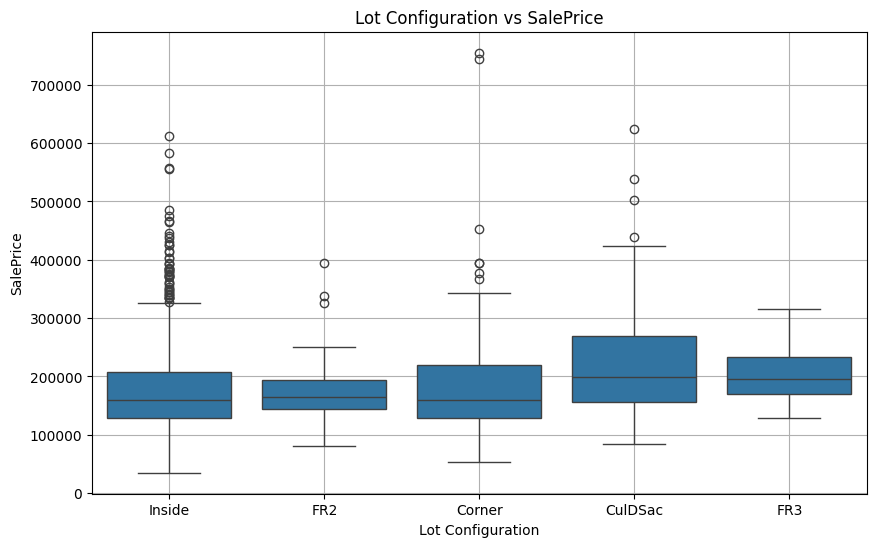

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x ='LotConfig',y = 'SalePrice',data = train_file)
plt.title('Lot Configuration vs SalePrice')
plt.xlabel('Lot Configuration')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

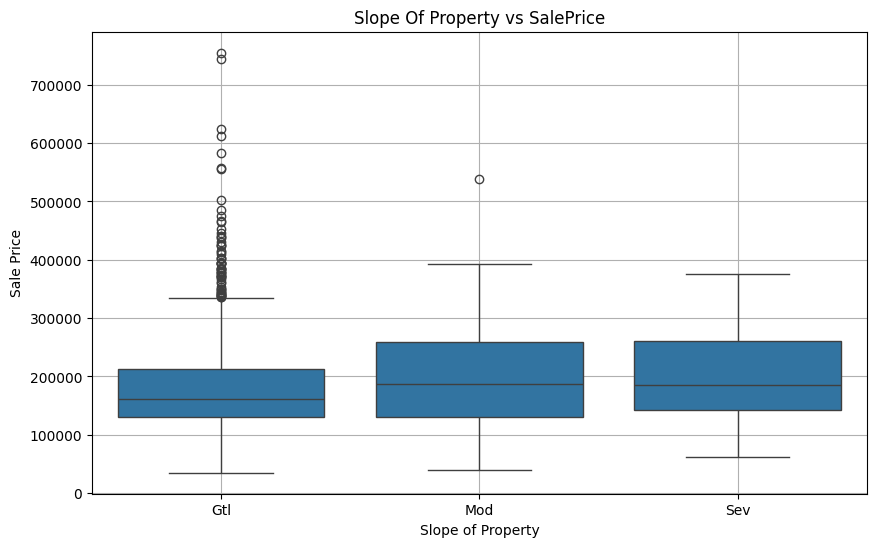

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'LandSlope',y = 'SalePrice',data = train_file)
plt.title('Slope Of Property vs SalePrice')
plt.xlabel('Slope of Property')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

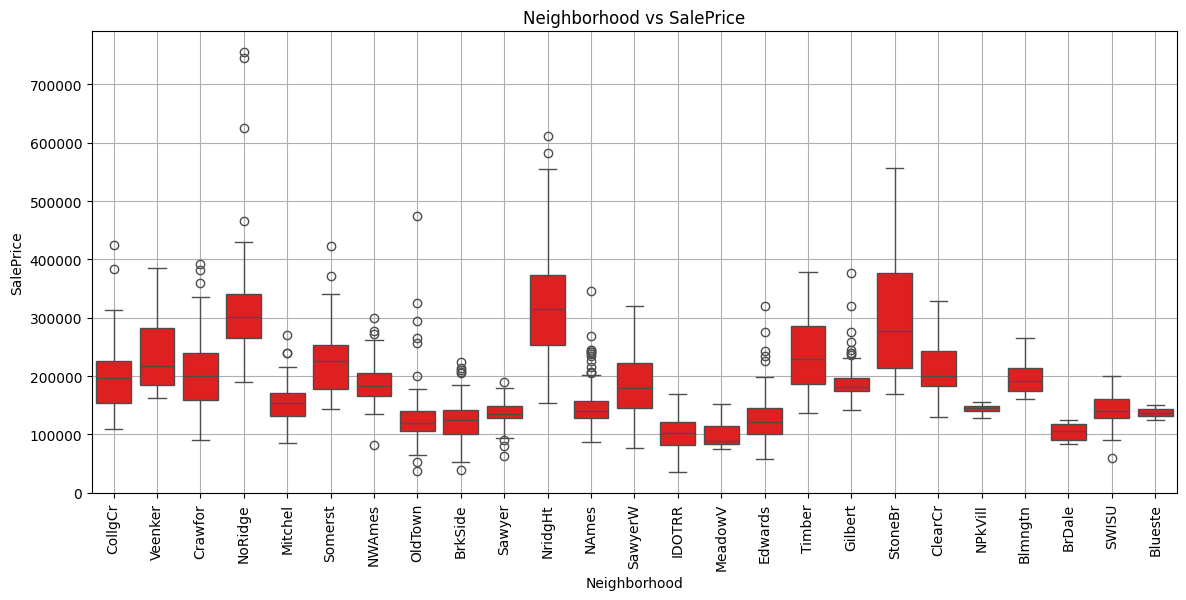

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(x = 'Neighborhood',y = 'SalePrice',data = train_file,color = 'red')
plt.title('Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

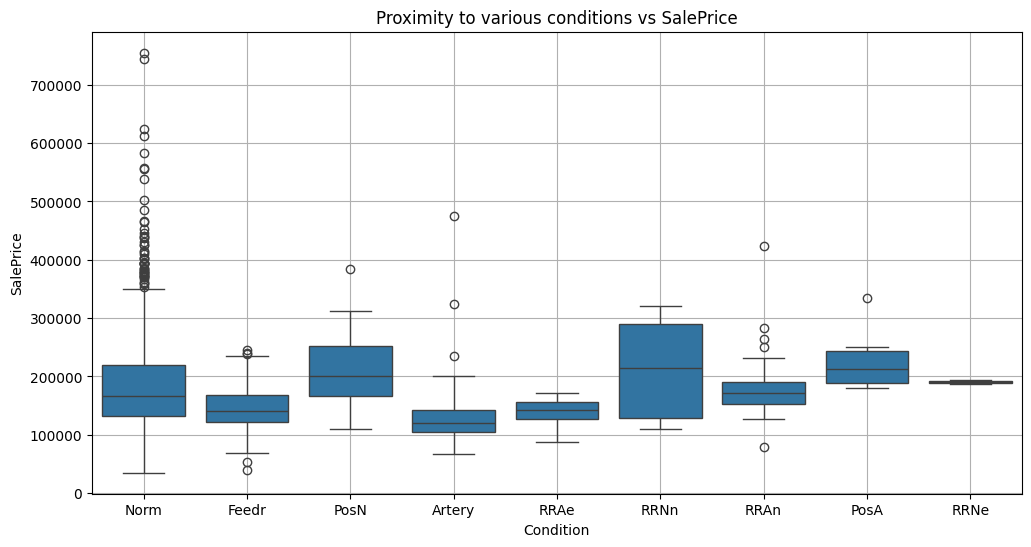

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Condition1',y ='SalePrice',data = train_file)
plt.title('Proximity to various conditions vs SalePrice')
plt.xlabel('Condition')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

#EXEMİNATİON

In [37]:
train_file.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,False,False,False,False,True,False,False,False,True,False
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,False,False,False,False,True,False,False,False,True,False
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,False,False,False,False,True,False,False,False,True,False
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,False,False,False,False,True,False,False,False,False,False
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
train_file.info()

In [ ]:
train_file.describe(include ='all').T

In [ ]:
train_file.columns

In [ ]:
train_file.dtypes

#MISSING VALUE ANALYSIS

In [2]:
print('Missing Values Count',train_file.isnull().sum())
print('*'*30)

#Percentage of missing values
missing_percentage = train_file.isnull().mean()*100
print('Percentage of Missing Value :',missing_percentage)
print('*'*30)

# List columns with missing values
missing_columns = missing_percentage[missing_percentage>0].index
print('Missing Columns',missing_columns)

Missing Values Count Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
******************************
Percentage of Missing Value : Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64
******************************
Missing Columns Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeatur

# DATA CLEANING

## Data Filling

In [3]:
for column in missing_columns:
  if train_file[column].dtype =='object':
    #For categorical variables,we fill in the variable that occurs most frequently
    train_file[column].fillna(train_file[column].mode()[0],inplace = True)

  else:
    # fill numeric variables with median
    train_file[column].fillna(train_file[column].median(),inplace = True)

## Outlier Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in train_file.select_dtypes(include =['float64','int64']).columns:
  plt.figure(figsize = (10,5))
  sns.boxplot(x = train_file[column],y = train_file['SalePrice'])
  plt.title(f"{column} - Box Plot")
  plt.show()

In [4]:
raw_data = train_file.copy()

#DATA CONVERSİON - CHOOSE FEATURE - MODEL - BUİLDİNG

In [5]:
train_file = train_file.drop('Id',axis = 1)
X = train_file.drop('SalePrice',axis = 1)
y = train_file['SalePrice']
X = pd.get_dummies(X,drop_first = True)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = X.select_dtypes(include = ['float64','int64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

X_train,X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 68)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred_norm = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_pred_norm,y_test)
r2 = r2_score(y_pred_norm,y_test)
print('MSE :',mse)
print('r2 :',r2)

MSE : 5.499633991986584e+25
r2 : -0.0021333982353595182


## Choose Feature

In [8]:
from sklearn.feature_selection import SelectKBest , f_regression

selector = SelectKBest(score_func = f_regression,k = 40)
X_new = selector.fit_transform(X,y)

selected_features = X.columns[selector.get_support()]
print('Selected Features',selected_features)

Selected Features Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MSZoning_RM',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'MasVnrType_Stone',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Detchd',
       'GarageFinish_Unf', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')


## Data Visualize to selected features

In [ ]:
#corr= train_file.corr()
#plt.figure(figsize = (12,10))
#sns.heatmap(corr,annot = True,cmap = 'coolwarm')
#plt.title('Correlation Matrix')
#plt.show()

In [ ]:
#for feature in selected_features:
 # plt.figure(figsize = (10,5))
 # sns.scatterplot(x = train_file[feature], y=y)
 # plt.title(f"SalePrice vs {feature}")
 # plt.show()

## Model Building and Evaluate

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.2,random_state = 42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print('Mean Squared Error :',mse)
print('R2 Score :',r2)

Mean Squared Error : 1097482269.9164371
R2 Score : 0.8569184360258248


#FEATURE ENGİNEERİNG --

##OBJECT-ONE HOT ENCODİNG

In [10]:
object_data = raw_data.select_dtypes(include='object')
numeric_data=raw_data.select_dtypes(include = ['float64','int64'])
numeric_data['HouseAge'] = numeric_data['YrSold'] - numeric_data['YearBuilt']
numeric_data['HouseRemovedYear'] = numeric_data['YrSold']- numeric_data['YearRemodAdd']
object_data[['MSSubClass','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']] = numeric_data[['MSSubClass','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']]
numeric_data = numeric_data.drop(['MSSubClass','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1)

In [11]:
columns_to_change = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'YrSold','GarageYrBlt']
object_data[columns_to_change] = object_data[columns_to_change].astype('object')

In [ ]:
object_data['YearBuilt'].mean()

1971.267808219178

In [12]:
#start year1872 - endyear 2010   ---- mean 1971
import numpy as np

bins = np.arange(1872,2020,10)

labels = ["1872-1882", "1882-1892", "1892-1902", "1902-1912", "1912-1922", "1922-1932", "1932-1942", "1942-1952", "1952-1962", "1962-1972", "1972-1982",
       "1982-1992","1992-2002" , "2002-2012"]

object_data['YearBuilt'] = pd.cut(object_data['YearBuilt'],bins = bins,labels = labels,right = False)

In [ ]:
object_data["YearRemodAdd"].mean()

1984.8657534246574

In [13]:
#start 1950- end 2010 mean 1984

bins = np.arange(1950,2020,10)
labels = ["1950-1960","1960-1970","1970-1980","1980-1990","1990-2000","2000-2010"]

object_data['YearRemodAdd'] = pd.cut(object_data['YearRemodAdd'],bins = bins,labels = labels,right = False)


In [ ]:
object_data['GarageYrBlt'].mean()

1978.5890410958905

In [14]:
# start 1900 - end 2010
bins = np.arange(1900,2020,10)
labels = ["1900-1910","1910-1920","1920-1930","1930-1940","1940-1950","1950-1960","1960-1970","1970-1980","1980-1990","1990-2000","2000-2010"]


object_data['GarageYrBlt'] = pd.cut(object_data['GarageYrBlt'],bins = bins,labels = labels,right = False)

In [ ]:
object_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,MnPrv,Shed,WD,Normal,60,2002-2012,2000-2010,2008,2000-2010
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Gd,MnPrv,Shed,WD,Normal,20,1972-1982,1970-1980,2007,1970-1980
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,MnPrv,Shed,WD,Normal,60,1992-2002,2000-2010,2008,2000-2010
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,MnPrv,Shed,WD,Abnorml,70,1912-1922,1970-1980,2006,1990-2000
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,MnPrv,Shed,WD,Normal,60,1992-2002,2000-2010,2008,2000-2010


In [ ]:
object_data.iloc[:,30:50].head()

,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt
0,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,60,2002-2012,2000-2010,2008,2000-2010
1,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,20,1972-1982,1970-1980,2007,1970-1980
2,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,60,1992-2002,2000-2010,2008,2000-2010
3,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml,70,1912-1922,1970-1980,2006,1990-2000
4,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,60,1992-2002,2000-2010,2008,2000-2010


In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(object_data)

OneHotEncoder()

In [16]:
feature_names = ohe.get_feature_names_out(object_data.columns)

In [17]:
ohe_data = pd.DataFrame(ohe.transform(object_data).toarray(),columns = feature_names)
ohe_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,GarageYrBlt_1920-1930,GarageYrBlt_1930-1940,GarageYrBlt_1940-1950,GarageYrBlt_1950-1960,GarageYrBlt_1960-1970,GarageYrBlt_1970-1980,GarageYrBlt_1980-1990,GarageYrBlt_1990-2000,GarageYrBlt_2000-2010,GarageYrBlt_nan
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
ohe_data.shape

(1460, 304)

##numeric

In [18]:
numeric_data = numeric_data.drop('Id',axis = 1)

In [14]:
numeric_data.iloc[:,:20].head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9


In [21]:
numeric_data.iloc[:,20:].head()

,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,HouseRemovedYear
0,0,2,548,0,61,0,0,0,0,0,2,208500,5,5
1,1,2,460,298,0,0,0,0,0,0,5,181500,31,31
2,1,2,608,0,42,0,0,0,0,0,9,223500,7,6
3,1,3,642,0,35,272,0,0,0,0,2,140000,91,36
4,1,3,836,192,84,0,0,0,0,0,12,250000,8,8


In [61]:
numeric_data.shape

(1460, 34)

In [20]:
numeric_data['Sale_with_LotArea_ratio'] = numeric_data['SalePrice'] / numeric_data['LotArea']

numeric_data['Sale_with_HouseAge_ratio'] = np.where(
    numeric_data['HouseAge'] != 0,
    numeric_data['SalePrice'] / numeric_data['HouseAge'],
    numeric_data['SalePrice']
)

numeric_data['Sale_with_TotalRoom_ratio'] = numeric_data['SalePrice'] / numeric_data['TotRmsAbvGrd']

In [64]:
numeric_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,HouseRemovedYear,Sale_with_LotArea_ratio,Sale_with_HouseAge_ratio,Sale_with_TotalRoom_ratio
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,2,208500,5,5,24.674556,41700.000000,26062.500000
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,5,181500,31,31,18.906250,5854.838710,30250.000000
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,9,223500,7,6,19.866667,31928.571429,37250.000000
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,2,140000,91,36,14.659686,1538.461538,20000.000000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,12,250000,8,8,17.531557,31250.000000,27777.777778


In [ ]:
import numpy as np

# NaN değerlerin kontrolü
print("NaN değerler:")
print(numeric_data.isna().sum())
print(ohe_data.isna().sum())

# Infinity değerlerin kontrolü
print("Infinity değerler:")
print(np.isinf(numeric_data).sum())
print(np.isinf(ohe_data).sum())

# Aşırı büyük değerlerin kontrolü
print("Aşırı büyük değerler:")
print(np.isneginf(numeric_data).sum())
print(np.isneginf(ohe_data).sum())


In [22]:
ohe_data.reset_index(inplace=True)
numeric_data.reset_index(inplace = True)

In [23]:
merge_data = pd.concat([ohe_data,numeric_data],axis =1)
merge_data_copy = merge_data.copy()

In [24]:
y = merge_data['SalePrice']
merge_data = merge_data.drop('SalePrice',axis = 1)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = merge_data.columns
merge_data[numeric_columns] = scaler.fit_transform(merge_data[numeric_columns])

In [25]:
merge_data

,index,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,HouseRemovedYear,Sale_with_LotArea_ratio,Sale_with_HouseAge_ratio,Sale_with_TotalRoom_ratio
0,-1.730865,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,0.169981,-0.169981,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.043259,-0.869941,0.291091,-0.016690,-0.191685
1,-1.728492,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,0.169981,-0.169981,...,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.183465,0.390141,-0.174721,-0.418157,0.243094
2,-1.726120,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,0.169981,-0.169981,...,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-0.977121,-0.821476,-0.097164,-0.126131,0.969890
3,-1.723747,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,0.169981,-0.169981,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.800676,0.632464,-0.517648,-0.466500,-0.821142
4,-1.721374,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,0.169981,-0.169981,...,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.944052,-0.724547,-0.285733,-0.133731,-0.013591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,0.169981,-0.169981,...,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.944052,-0.773012,0.083536,-0.238731,-0.302002
1456,1.723747,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,0.169981,-0.169981,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-0.150396,-0.046041,-0.414315,-0.410231,0.217137
1457,1.726120,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,0.169981,-0.169981,...,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.073157,-0.918406,0.678630,-0.440473,0.176760
1458,1.728492,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,0.064238,0.169981,-0.169981,...,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.775536,-0.433759,-0.520333,-0.457201,0.053608


## Build Model And Evaluate


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train,X_test,y_train,y_test = train_test_split(merge_data,y,test_size = 0.2,random_state=68)

model= LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print('MSE :',mse)
print('r2 :',r2)

MSE : 1.9394431306049913e+34
r2 : -4.940782533613408e-05


In [27]:
from sklearn.feature_selection import SelectKBest,f_regression

selector = SelectKBest(score_func = f_regression,k = 100)
X_new = selector.fit_transform(merge_data,y)

selected_features = merge_data.columns[selector.get_support()]
print('Selected_Features',selected_features)

Selected_Features Index(['MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'HouseStyle_1.5Fin', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_WdShngl',
       'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'MasVnrType_BrkFace', 'MasVnrType_Stone', 'ExterQual_Ex',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y',
       'Electrical_FuseA', 'Electrical_SBrkr', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'Kitchen

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.2,random_state=68)

model= LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print('MSE :',mse)
print('r2 :',r2)

MSE : 241971216.3843643
r2 : 0.9519824385096837


In [29]:
y_log = np.log(y)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train,X_test,y_train,y_test = train_test_split(X_new,y_log,test_size = 0.2,random_state=68)

model= LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print('MSE :',mse)
print('r2 :',r2)

MSE : 0.007308174975646962
r2 : 0.9478712420867268


In [31]:
# USE MODELS
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X_train,X_test,y_train,y_test = train_test_split(X_new,y_log,test_size = 0.2,random_state=68)
# Create Instant
ridge_model = Ridge(alpha = 1)
lasso_model = Lasso(alpha = 1)
elastic_model = ElasticNet(alpha =1,l1_ratio=0.5)
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor(n_estimators =100)
gb_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()
svr_model = SVR(kernel = 'rbf')
knr_model = KNeighborsRegressor(n_neighbors=5)

clf = {
    "Ridge Model": ridge_model,
    "Lasso Model": lasso_model,
    'Elastic Model': elastic_model,
    'Decision Tree Model':tree_model,
    'Random Forest Model' : rf_model,
    'Gradient Boost Model':gb_model,
    'SVR Model': svr_model,
    'K Neighbors Model':knr_model
}



def train_regression(clf,X_train,X_test,y_train,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  mse = mean_squared_error(y_pred,y_test)
  r2 = r2_score(y_pred,y_test)

  return mse,r2

for name , clf in clf.items():
  current_mse , current_r2 = train_regression(clf,X_train,X_test,y_train,y_test)
  print(f'For :{name}')
  print(f'MSE Score :{current_mse}')
  print(f"r2 Score : {current_r2}")
  print('*' * 40)

For :Ridge Model
MSE Score :0.0073018171624203215
r2 Score : 0.9478310373804102
****************************************
For :Lasso Model
MSE Score :0.1500299461523261
r2 Score : -4.754638782305128e+28
****************************************
For :Elastic Model
MSE Score :0.1500299461523261
r2 Score : -4.754638782305128e+28
****************************************
For :Decision Tree Model
MSE Score :0.01583306337119368
r2 Score : 0.8915801380555275
****************************************
For :Random Forest Model
MSE Score :0.0061395931823389266
r2 Score : 0.9533247415491994
****************************************
For :Gradient Boost Model
MSE Score :0.003761230493638147
r2 Score : 0.9734670481396146
****************************************
For :SVR Model
MSE Score :0.015805341044322456
r2 Score : 0.8766703073216618
****************************************
For :K Neighbors Model
MSE Score :0.03284170187131128
r2 Score : 0.7033309209432396
****************************************


#Outlier operations

In [102]:
merge_data_copy.shape

(1460, 343)

In [103]:
# Z-Score Method
from scipy import stats

z_scores = stats.zscore(merge_data_copy)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_clean = merge_data_copy[filtered_entries]

In [40]:
data_clean.shape

(58, 343)

In [42]:
#IQR
Q1 = merge_data_copy.quantile(0.25)
Q3 = merge_data_copy.quantile(0.75)
IQR = Q3 - Q1
data_clean_ıqr = merge_data_copy[~((merge_data_copy < (Q1 - 1.5 * IQR)) | (merge_data_copy > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
data_clean_ıqr.shape

(0, 343)

In [32]:
# ISOFOREST
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
yhat = iso_forest.fit_predict(merge_data_copy)
data_clean_iso = merge_data_copy[yhat == 1]
data_clean_iso.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(1445, 343)

In [48]:
#ONECLASSSVM
from sklearn.svm import OneClassSVM

oc_svm = OneClassSVM(gamma='auto').fit(merge_data_copy)
yhat = oc_svm.predict(merge_data_copy)
data_clean_oclass = merge_data_copy[yhat == 1]
data_clean_oclass.shape

(3, 343)

In [33]:
y_clean_iso = data_clean_iso['SalePrice']
data_clean_iso = data_clean_iso.drop('SalePrice',axis =1)
y_log_iso = np.log(y_clean_iso)

###1.1 Data Clean And Normal Saleprice Value

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train,X_test,y_train,y_test = train_test_split(data_clean_iso,y_clean_iso,test_size = 0.2,random_state=68)

model= LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print('MSE :',mse)
print('r2 :',r2)

MSE : 1947373800451.652
r2 : 0.013416122520871765


###1.2 Data Clean and Log y Result

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train,X_test,y_train,y_test = train_test_split(data_clean_iso,y_log_iso,test_size = 0.2,random_state=68)

model= LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print('MSE :',mse)
print('r2 :',r2)

MSE : 147.30885483577046
r2 : -0.015433904416130906


###2.1 Clean Data and Use Select K best with Y = Normal Value

In [36]:
from sklearn.feature_selection import SelectKBest,f_regression

selector = SelectKBest(score_func = f_regression,k = 100)
X_new_iso = selector.fit_transform(data_clean_iso,y_clean_iso)

selected_features = merge_data.columns[selector.get_support()]
print('Selected_Features',selected_features)

Selected_Features Index(['MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Stone',
       'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y',
       'Electrical_FuseA', 'Electrical_SBrkr', 'KitchenQual_Ex',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Ex', 'FireplaceQu_Gd',
       'FireplaceQu_TA

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train,X_test,y_train,y_test = train_test_split(X_new_iso,y_clean_iso,test_size = 0.2,random_state=68)

model= LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print('MSE :',mse)
print('r2 :',r2)

MSE : 383173065.3204422
r2 : 0.9398480879112935


###2.2 - Clean Data - SelectKBest with Log_y values

In [38]:
from sklearn.feature_selection import SelectKBest,f_regression

selector = SelectKBest(score_func = f_regression,k = 100)
X_new_iso1 = selector.fit_transform(data_clean_iso,y_log_iso)

selected_features = merge_data.columns[selector.get_support()]
print('Selected_Features',selected_features)

Selected_Features Index(['MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1',
       'LotShape_Reg', 'Neighborhood_BrkSide', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_NAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Stone',
       'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y',
       'Electrical_FuseA', 'Electrical_SBrkr', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'K

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

X_train,X_test,y_train,y_test = train_test_split(X_new_iso1,y_log_iso,test_size = 0.2,random_state=68)

model= LinearRegression()
model.fit(X_train,y_train)

y_pred_log = model.predict(X_test)

mse = mean_squared_error(y_pred_log,y_test)
r2 = r2_score(y_pred_log,y_test)

print('MSE :',mse)
print('r2 :',r2)

MSE : 0.007270147943306654
r2 : 0.9565371185915966


In [40]:
# Convert Normal Value
y_pred_org = np.exp(y_pred_log)
y_test_org = np.exp(y_test)

mse_org = mean_squared_error(y_pred_org,y_test_org)
r2_org = r2_score(y_pred_org,y_test_org)
print('MSE ORG :' , mse_org)
print('r2 org :' ,r2_org)

MSE ORG : 544884764.5592759
r2 org : 0.9380839719957431


In [41]:
# USE MODELS
from sklearn.linear_model import Ridge , Lasso,ElasticNet ,LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

#X_train,X_test,y_train,y_test = train_test_split(merge_data,y,test_size = 0.2,random_state=68)
# Create Instant
ln_model = LinearRegression()
ridge_model = Ridge(alpha = 1)
lasso_model = Lasso(alpha = 1)
elastic_model = ElasticNet(alpha =1,l1_ratio=0.5)
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor(n_estimators =100)
gb_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()
svr_model = SVR(kernel = 'rbf')
knr_model = KNeighborsRegressor(n_neighbors=5)

clf = {
    'Linear Model':ln_model,
    "Ridge Model": ridge_model,
    "Lasso Model": lasso_model,
    'Elastic Model': elastic_model,
    'Decision Tree Model':tree_model,
    'Random Forest Model' : rf_model,
    'Gradient Boost Model':gb_model,
    'SVR Model': svr_model,
    'K Neighbors Model':knr_model
}


pred_list = []
def train_regression(clf,X_train,X_test,y_train,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  pred_list.append(y_pred)
  mse = mean_squared_error(y_pred,y_test)
  r2 = r2_score(y_pred,y_test)


  return mse,r2

for name , clf in clf.items():
  current_mse , current_r2 = train_regression(clf,X_train,X_test,y_train,y_test)
  print(f'For :{name}')
  print(f'MSE Score :{current_mse}')
  print(f"r2 Score : {current_r2}")
  print('*' * 40)

average_predictions = np.mean(pred_list,axis = 0)

average_mse = mean_squared_error(y_test, average_predictions)
average_r2 = r2_score(y_test, average_predictions)

print("Average Model Performance")
print(f'MSE Score: {average_mse}')
print(f'R2 Score: {average_r2}')

For :Linear Model
MSE Score :0.007270147943306654
r2 Score : 0.9565371185915966
****************************************
For :Ridge Model
MSE Score :0.007247884477667212
r2 Score : 0.95664044815997
****************************************
For :Lasso Model
MSE Score :0.025806074629699437
r2 Score : 0.8289691811516288
****************************************
For :Elastic Model
MSE Score :0.02481364286235381
r2 Score : 0.8389688165867752
****************************************
For :Decision Tree Model
MSE Score :0.01320855853767129
r2 Score : 0.9167020368759452
****************************************
For :Random Forest Model
MSE Score :0.005803032100629494
r2 Score : 0.9602018057096265
****************************************
For :Gradient Boost Model
MSE Score :0.0035983007711347446
r2 Score : 0.9775367860144406
****************************************
For :SVR Model
MSE Score :0.03081817789944162
r2 Score : 0.7190116578411487
****************************************
For :K Neighbors M

For :Random Forest Model
MSE Score :0.005803032100629494
r2 Score : 0.9602018057096265

In [42]:
# Random Forest Model-Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf,param_grid = param_grid,cv = 5,n_jobs = -1,verbose = 2)
rf_grid.fit(X_train,y_train)
best_params = rf_grid.best_params_
print('Best PArams :',best_params)

# PRedict
rf_cv = RandomForestRegressor(**best_params)
rf_cv.fit(X_train,y_train)
rf_pred = rf_cv.predict(X_test)

mse = mean_squared_error(y_test,rf_pred)
r2 = r2_score(y_test,rf_pred)
print('MSE witt LOG Result :' ,mse)
print('r2 with Log Result :',r2)

# Convert And Evaluate
y_test_org = np.exp(y_test)
rf_pred_org = np.exp(rf_pred)

mse_org=mean_squared_error(y_test_org,rf_pred_org)
r2_org = r2_score(y_test_org,rf_pred_org)
print('MSE Original Result :' ,mse_org)
print('r2 Original Result :', r2_org)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best PArams : {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE witt LOG Result : 0.006024106159388052
r2 with Log Result : 0.9647395137646606
MSE Original Result : 395441758.66420823
r2 Original Result : 0.9419154037080109


#CORR

In [ ]:
corr_numeric = numeric_data.corr()

# Sale price ile corelasyonunu hesaplayıp corelasyonu büyükten küçüğe sıralıyoruz
corr_with_saleprice = corr_numeric['SalePrice'].sort_values(ascending = False)

top_20_features = corr_with_saleprice.index[1:21]

plt.figure(figsize = (16,14))
sns.heatmap(numeric_data[top_20_features].corr(),annot = True)
plt.title('Corr MAtrix')
plt.show()

In [ ]:
for feature in top_20_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=numeric_data[feature], y=numeric_data['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
    plt.show()

In [ ]:
top_20_features

Index(['YrSold', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'HalfBath',
       'FullBath', 'MoSold', 'LotArea', 'OpenPorchSF', 'BedroomAbvGr',
       'GrLivArea', 'LotFrontage', 'OverallQual', 'GarageArea', '2ndFlrSF',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageYrBlt',
       'BsmtFullBath'],
      dtype='object')